 # Milestone 1

- Name  : Cici Yuriza
- Batch : HCK-005

# Description

Objective :\
Untuk meningkatkan pendapatan 100% pada 2024 dengan memanfaatkan strategi marketing dan tim penjualan.

Problem Statement :\
Analisis perilaku customers dari tahun 2021 hingga 2023 berdasarkan pengelompokkan tahun.Untuk meraih strategi pemasaran yg tepat sehingga meningkatkan pendapatan 100% tahun 2024. Analisis ini penting agar dapat memasarkan produk kepada customer dengan tepat.


Penjabaran Masalah dengan metode 5W + 1H :
- pengelompokkan data berdasarkan tahun.
1. Pendapatan terbesar ada di mall yang mana ?
2. bulan apa yg paling bagus untuk melakukan sale ?
3. hari apa yang paling bagus untuk memasang iklan (memaksimalkan kemungkinan konsumen membeli produk) ?
4. Bagaimana pemilihan pembayaran berdasarkan usia ?
5. Apakah usia mempengaruhi tingkat pembelian ?
6. Siapakah yang paling banyak bertransaksi(M/F) ?


## Working Area

### Data Loading

Sumber data : https://www.kaggle.com/datasets/datascientistanna/customers-dataset

In [60]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [61]:
# read data
df = pd.read_csv('dataset/customer_shopping_data.csv')

In [62]:
pd.set_option('display.max_columns', None)

In [63]:
# menampilkan 5 data teratas
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [64]:
# menampilkan 5 data terakhir
df.tail()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park
99456,I232867,C273973,Female,36,Souvenir,3,35.19,Credit Card,15/10/2022,Mall of Istanbul


### Data Cleaning

In [65]:
# menampilkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,99457.0,43.427089,14.990054,18.00,30.00,43.0,56.00,69.0
quantity,99457.0,3.003429,1.413025,1.00,2.00,3.0,4.00,5.0
price,99457.0,689.256321,941.184567,5.23,45.45,203.3,1200.32,5250.0


Tidak ada nilai minimum yang < 0

In [67]:
# cek duplicate data
df.duplicated().sum()

0

tidak ada data yang duplikat.

In [68]:
# fungsi menghitung jumlah missing value setiap column
def show_missing(df):
    '''Calculate any missing value in every column.
    |parameter dataframe
    |return a dataframe with sorted data from the most missing values'''
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    # calculate every column (data type, row length, total unique value and NaN values)
    for item in df.columns: 
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())

    df_missing = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing
    })    
        
    return df_missing.sort_values('missing',ascending=False)

In [69]:
show_missing(df)

,variable,dtype,count,unique,missing
0,invoice_no,object,99457,99457,0
1,customer_id,object,99457,99457,0
2,gender,object,99457,2,0
3,age,int64,99457,52,0
4,category,object,99457,8,0
5,quantity,int64,99457,5,0
6,price,float64,99457,40,0
7,payment_method,object,99457,3,0
8,invoice_date,object,99457,797,0
9,shopping_mall,object,99457,10,0


Tidak ada missing value

Cek non-standard missing value

In [70]:
# Dilakukan pengecekan apakah terdapat non-standard value pada setiap baris di masing-masing kolom

dic = {}

for i in list(df.columns):
  dic[i] = 0
  for j in df[i]:
    if j in ['N/A', '--', '-', 'Null']:
      dic[i] = dic[i] + 1

dic

{'invoice_no': 0,
 'customer_id': 0,
 'gender': 0,
 'age': 0,
 'category': 0,
 'quantity': 0,
 'price': 0,
 'payment_method': 0,
 'invoice_date': 0,
 'shopping_mall': 0}

Tidak ada non-standard missing value

In [71]:
# change date type invoice_date into datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df['invoice_date']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11396\4290732610.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['invoice_date'] = pd.to_datetime(df['invoice_date'])


0       2022-05-08
1       2021-12-12
2       2021-09-11
3       2021-05-16
4       2021-10-24
           ...    
99452   2022-09-21
99453   2021-09-22
99454   2021-03-28
99455   2021-03-16
99456   2022-10-15
Name: invoice_date, Length: 99457, dtype: datetime64[ns]

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


In [73]:
def unique_and_value_count(df):
    '''function for calculate how many unique value in column and value count of every unique
    |parameter dataframe'''

    col_names=[col for col in df.columns if df[col].dtype == "object"]
    
    for col in col_names:
        if df[col].nunique() < 15: # unique less than 15
            print('Unique   ',len(df[col].unique()))
            print(df[col].value_counts())
            print("--"*10)

In [74]:
unique_and_value_count(df)

Unique    2
Female    59482
Male      39975
Name: gender, dtype: int64
--------------------
Unique    8
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: category, dtype: int64
--------------------
Unique    3
Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64
--------------------
Unique    10
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: shopping_mall, dtype: int64
--------------------


### Analisis dan Perhitungan

#### Menambahkan kolom :
1. pendapatan, didapat dari nilai quantity * price
2. mengkategorikan usia (age) kedalam kategori "young, middle, dan old"
3. menambahkan kolom hari, bulan dan tahun.

In [75]:
# menambahkan kolom pendapatan yang diisi dengan quantity * price

pendapatan = []
for i in range(len(df)) :
    pendapatan.append(df['quantity'][i]*df['price'][i])

df['income'] = pendapatan

In [76]:
# membuat fungsi pengelompokan usia
def age_category(df):
    '''Function for cotegorize age.
    |parameter dataframe
    |return list of age category.
    '''
    age = []

    for i in range(len(df)):
        if df['age'][i] > 50 : #more than 50
            age.append('old')
        elif df['age'][i] > 30 : #more than 30
            age.append('middle')
        else : # less than or equal to 30
            age.append('young')
    return age

In [77]:
# membuat fungsi convert tanggal menjadi hari
def date_to_day(df):
    '''function for convert date to day
    |parameter dataframe
    |return list of day'''
    day = []
    for i in range(len(df)):
        day.append(df['invoice_date'][i].strftime("%A")) # convert to day
    return day

In [78]:
# menambahkan kolom kategori usia
df['age_category'] = age_category(df)

In [79]:
# menambahkan kolom year and month berdasarkan invoice_date
df['year'],df['month'] = df['invoice_date'].dt.year, df['invoice_date'].dt.month

In [80]:
# menambahkan kolom day berdasrkan invoice_date
df['day'] = date_to_day(df)

In [81]:
# menampilkan 5 data teratas
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,income,age_category,year,month,day
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,7502.00,young,2022,5,Sunday
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,young,2021,12,Sunday
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity,300.08,young,2021,9,Saturday
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,old,2021,5,Sunday
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,old,2021,10,Sunday


#### 1. Pendapatan terbesar ada di mall yang mana ?
1.1 dari tahun 2021-2023\
1.2 untuk masing-masing tahun\
1.2.1 Check perbedaan pendapatan setiap tahun dengan melihat pendapatan perbulan

In [82]:
# pendapatan setiap tahun
df.groupby('year')['income'].sum().reset_index().sort_values(by='income', ascending=False)

,year,income
1,2022,1.154368e+08
0,2021,1.145606e+08
2,2023,2.150841e+07


In [83]:
# pendapatan dari 2021 - 2023 untuk setiap mall
(df.groupby(['shopping_mall'])['income'].sum().reset_index().sort_values(by='income',ascending=False))

,shopping_mall,income
5,Mall of Istanbul,50872481.68
4,Kanyon,50554231.10
6,Metrocity,37302787.33
7,Metropol AVM,25379913.19
3,Istinye Park,24618827.68
9,Zorlu Center,12901053.82
0,Cevahir AVM,12645138.20
8,Viaport Outlet,12521339.72
1,Emaar Square Mall,12406100.29
2,Forum Istanbul,12303921.24


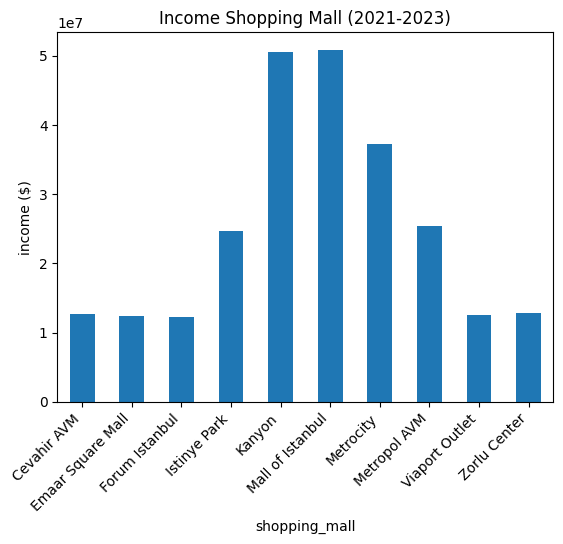

In [148]:
# melihat pendapatan terbesar
(df.groupby(['shopping_mall'])['income'].sum()).plot(kind='bar', ylabel='income ($)')
plt.xticks(rotation=45, ha='right')
plt.title('Income Shopping Mall (2021-2023)')
plt.show()

`mall paling banyak mendapat income sepanjang tahun 2021-2023 adalah mall of istanbul.`

In [85]:
# pendapatan setiap tahun
df.groupby(['year','shopping_mall'])['income'].sum().reset_index().sort_values(by='income',ascending=False)

,year,shopping_mall,income
15,2022,Mall of Istanbul,23410362.30
5,2021,Mall of Istanbul,23269156.43
4,2021,Kanyon,23168216.05
14,2022,Kanyon,22922200.33
16,2022,Metrocity,17244618.86
6,2021,Metrocity,16665693.56
7,2021,Metropol AVM,11795485.33
13,2022,Istinye Park,11469526.74
17,2022,Metropol AVM,11375841.00
3,2021,Istinye Park,11153570.10


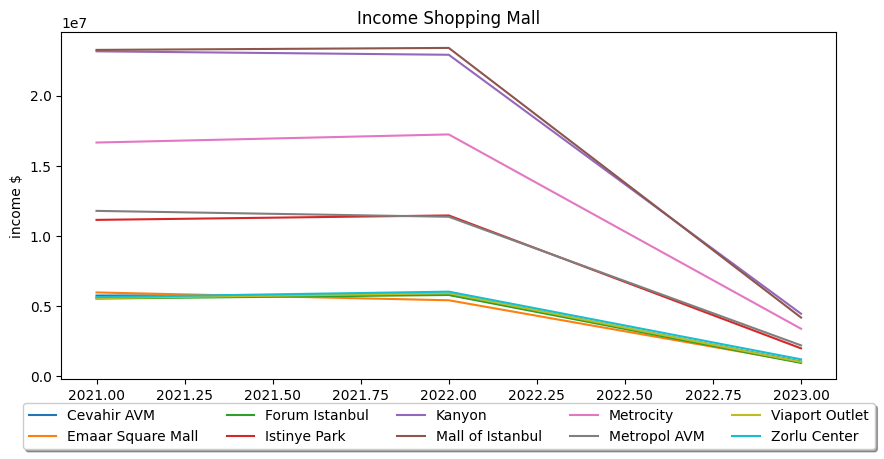

In [147]:
# show graph for income 
ax = (df.groupby(['shopping_mall', 'year'])['income'].sum()).unstack(level=0).plot(kind='line',figsize=(10,5),ylabel='income $')


# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

plt.title('Income Shopping Mall')

plt.show()

`Pada tahun 2021 dan 2022 income paling banyak diperoleh dari mall of istanbul.
Pada tahun 2023 mall kanyon mendapat income yang paling besar.`\
Namun dapat dilihat bahwa terjadi penurunan pendapatan yang sangat signifikan ditahun 2023. Lets check what happen!

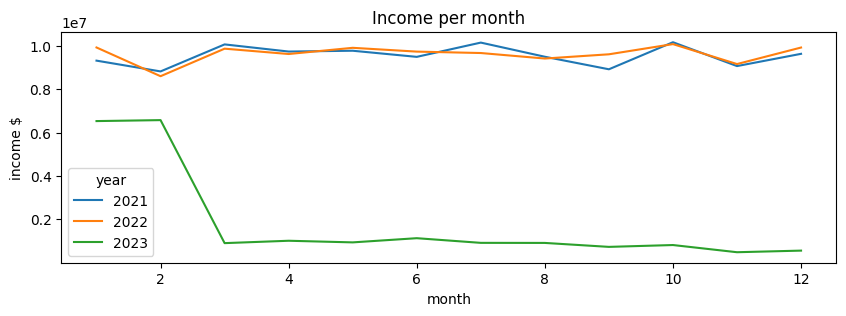

In [146]:
# line plot using pandas
df.groupby(['month','year'])['income'].sum().unstack(level=1).plot(kind='line', figsize=(10,3),ylabel='income $')
plt.title('Income per month')
plt.show()

Ternyata pendapatan sangat jauh berbeda untuk setiap bulan antara tahun 2023 dengan 2022 dan 2021.

#### 2. bulan apa yg paling bagus untuk sale ?

In [88]:
# dataframe pendapatan perbulan
df_month = df.groupby(['month'])['income'].sum().reset_index()
df_month['income'] = df_month['income']/1000000 #income menjadi permillion dollar
df_month

,month,income
0,1,25.755677
1,2,23.980068
2,3,20.826197
3,4,20.360575
4,5,20.608278
5,6,20.344057
6,7,20.721537
7,8,19.812562
8,9,19.248109
9,10,21.049008


Text(0.5, 1.0, 'Income per Month')

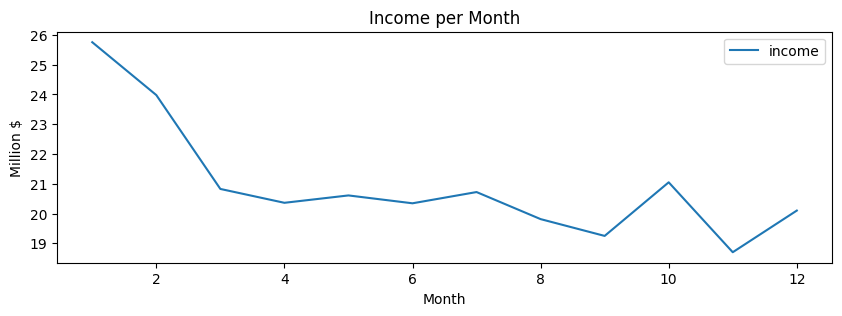

In [149]:
# pendapatan per bulan
df_month.plot(kind='line',x='month',y='income',xlabel='Month',ylabel='Million $', figsize=(10,3))
plt.title('Income per Month')

In [90]:
# menyimpan data setiap bulan untuk setiap kategori
df_month_cat = df.groupby(['month','category'])['income'].sum()
df_month_cat

month  category       
1      Books                 87233.70
       Clothing           11598692.16
       Cosmetics            731920.66
       Food & Beverage       85892.29
       Shoes               6715302.13
                             ...     
12     Food & Beverage       70406.26
       Shoes               5217277.81
       Souvenir              49512.33
       Technology          4508700.00
       Toys                 345318.40
Name: income, Length: 96, dtype: float64

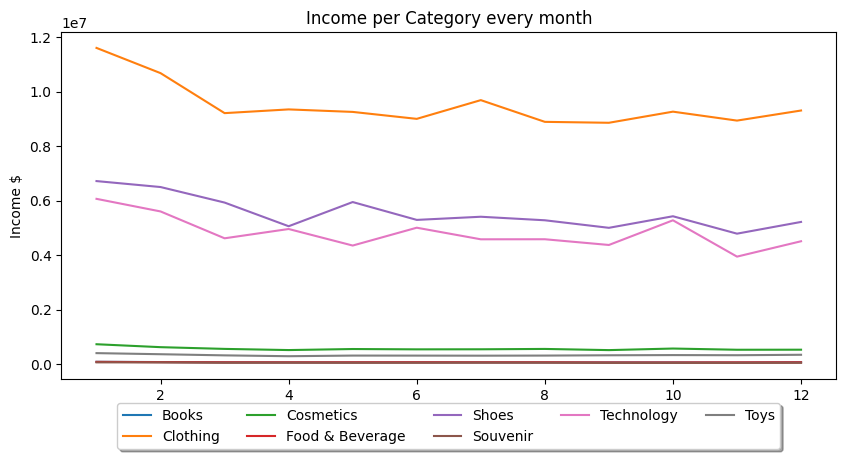

In [156]:
# melihat pendapatan setiap category setiap bulan
ax = df_month_cat.unstack(level=1).plot(kind='line', figsize=(10,5),ylabel='Income $')
plt.title('Income per Category every month')

# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

plt.show()

1. Bulan yang paling bagus untuk melakukan sale adalah bulan Januari.
2. Category yang paling tinggi pendapatannya adalah clothing

#### 3. hari apa yang paling bagus untuk memasang iklan (memaksimalkan kemungkinan konsumen membeli produk) ?

In [92]:
# lihat pendapatan paling banyak berdasarkan hari
df_day = df.groupby('day')['income'].sum().reset_index()
df_day['income'] = df_day['income']/1000000 # per million dollar
df_day.set_index('day',inplace=True)
df_day

,income
day,
Friday,36.461539
Monday,37.578624
Saturday,36.509127
Sunday,34.130253
Thursday,35.679669
Tuesday,35.510654
Wednesday,35.635928


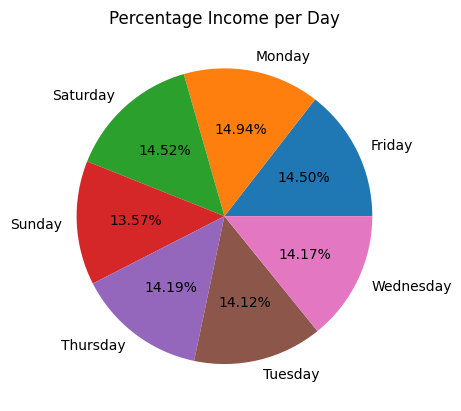

In [93]:
ax = df_day.plot(kind='pie',y='income', autopct='%.2f%%', legend=False)
ax.set_title('Percentage Income per Day')
ax.set_ylabel(None)
plt.show()

Hari yang paling tinggi pendapatannya adalah _Monday_ sehingga dapat memperbanyak iklan pada hari tersebut.

#### 4. Bagaimana pemilihan pembayaran berdasarkan usia ?

In [94]:
# melihat pendapatan berdasarkan metode pembayaran
payment_method = (df.groupby('payment_method')['income'].sum().reset_index())
payment_method

,payment_method,income
0,Cash,1.128322e+08
1,Credit Card,8.807712e+07
2,Debit Card,5.059643e+07


Text(0.5, 1.0, 'Diagram Payment Method')

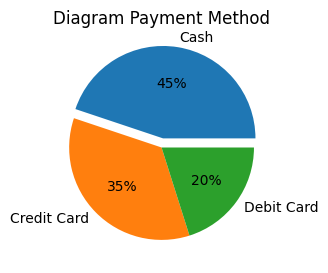

In [95]:
# pie chart payment method
fig = plt.figure(figsize=(3,3))
ax = plt.axes()
ax.pie(payment_method.income, labels = payment_method.payment_method, autopct='%1.0f%%'
       ,explode=(0.1,0,0))
ax.set_title('Diagram Payment Method')

Cash merupakan metode pembayaran yang paling banyak digunakan hingga mencapai 45% dari jumlah transaksi.

In [96]:
# melihat hubungan antara age category dengan payment method
(df.groupby(['age_category','payment_method'])[['invoice_no']].count().reset_index())

,age_category,payment_method,invoice_no
0,middle,Cash,17082
1,middle,Credit Card,13471
2,middle,Debit Card,7779
3,old,Cash,16188
4,old,Credit Card,12675
5,old,Debit Card,7238
6,young,Cash,11177
7,young,Credit Card,8785
8,young,Debit Card,5062


(array([0, 1, 2]),
 [Text(0, 0, 'middle'), Text(1, 0, 'old'), Text(2, 0, 'young')])

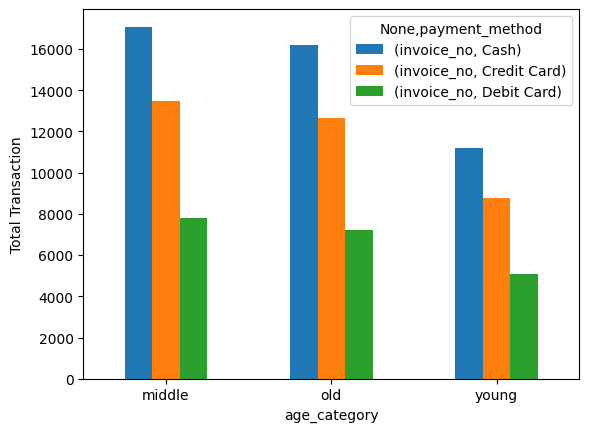

In [144]:
# plot hubungan antara age category dengan payment method
(df.groupby(['age_category','payment_method'])[['invoice_no']].count()).unstack(level=1).plot(kind='bar')
plt.ylabel('Total Transaction')
plt.xticks(rotation=0)

`age dengan category young, middle dan old paling banyak menggunakan metode pembayaran cash.`\
Semua kategori usia paling sedikit menggunakan debit card kemudian credit card.

#### 5. Apakah usia mempengaruhi tingkat pembelian ?

In [98]:
# menghitung jumlah transaksi, jumlah item, dan pendapatan berdasarkan kategori usia
df_age = df.groupby('age_category')[['invoice_no','income','quantity']].agg({'invoice_no':'count','quantity':'sum','income':'sum'}).reset_index().sort_values(by='invoice_no', ascending=False)

In [99]:
df_age

,age_category,invoice_no,quantity,income
0,middle,38332,115006,97150259.90
1,old,36101,108534,91308132.24
2,young,25024,75172,63047402.11


Text(0.5, 1.0, 'Diagram Jumlah transaksi')

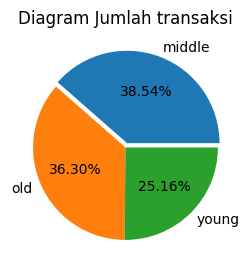

In [100]:
# pie chart
fig = plt.figure(figsize=(3,3))
ax = plt.axes()
ax.pie(df_age.invoice_no, labels = df_age.age_category, autopct='%.2f%%'
       ,explode=(0.05,0,0))
ax.set_title('Total Transaction')

`usia middle paling banyak melakukan transaksi. kemudian old dan terakhir young`.

#### 6. Siapakah yang paling banyak bertransaksi(M/F) ?

6.1 Category apa yang paling banyak dibeli ?

In [101]:
# menghitung quantity dan pendapatan berdasarkan gender
df.groupby('gender')[['quantity','income','invoice_no']].agg({'invoice_no':'count','quantity':'sum', 'income':'sum'}).reset_index()

,gender,invoice_no,quantity,income
0,Female,59482,178659,1.502071e+08
1,Male,39975,120053,1.012987e+08


`gender female paling banyak bertransaksi`

In [102]:
# category yang paling banyak dibeli
df_cat = df.groupby(['gender','category'])[['quantity','income']].sum().sort_values(by='income', ascending=False).reset_index()
df_cat

,gender,category,quantity,income
0,Female,Clothing,62039,68251695.60
1,Male,Clothing,41519,45745095.44
2,Female,Shoes,17906,39425167.30
3,Female,Technology,8977,34669950.00
4,Male,Shoes,12311,27128284.17
5,Male,Technology,6044,23192400.00
6,Female,Cosmetics,27261,4066772.54
7,Male,Cosmetics,18204,2726090.36
8,Female,Toys,18362,2416046.08
9,Male,Toys,11959,1564380.16


In [103]:
df_cat[df_cat['gender']=='Female']

,gender,category,quantity,income
0,Female,Clothing,62039,68251695.60
2,Female,Shoes,17906,39425167.30
3,Female,Technology,8977,34669950.00
6,Female,Cosmetics,27261,4066772.54
8,Female,Toys,18362,2416046.08
10,Female,Food & Beverage,26362,505322.60
11,Female,Books,8776,489314.70
12,Female,Souvenir,8976,382867.20


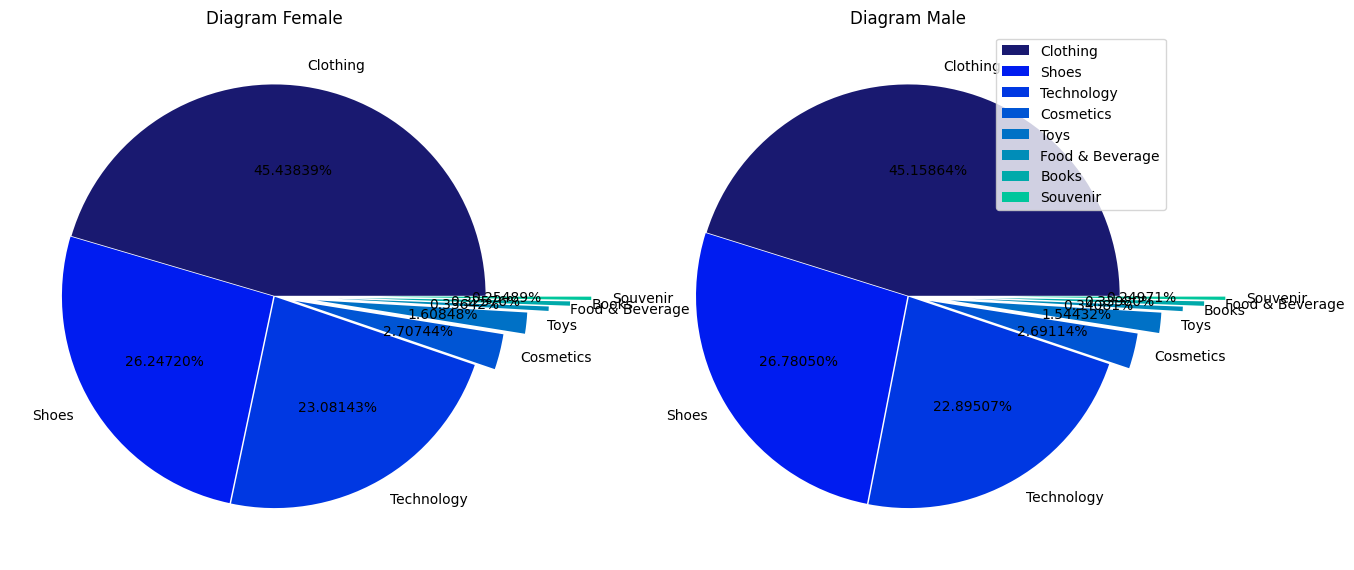

In [104]:
explode = ( 0, 0.005, 0.005, 0.1, 0.2, 0.3, 0.4, 0.5)
colors = ['#191970', '#001CF0', '#0038E2', '#0055D4', '#0071C6', '#008DB8', '#00AAAA',
          '#00C69C']

fig, axes = plt.subplots(ncols=2,figsize=(15,10))

axes[0].pie(df_cat[df_cat['gender']=='Female'].income, labels = df_cat[df_cat['gender']=='Female'].category, autopct='%.5f%%'
       ,colors=colors, explode=explode)
axes[0].set_title('Diagram Female')
axes[1].pie(df_cat[df_cat['gender']=='Male'].income, labels = df_cat[df_cat['gender']=='Male'].category, autopct='%.5f%%'
       ,colors=colors, explode=explode)
axes[1].set_title('Diagram Male')
plt.legend(df_cat[df_cat['gender']=='Female'].category, loc="best")
plt.show()

Untuk semua costomer, paling banyak income didapat dari category **clothing**.

#### Analisis Measure central tendency (mean, median dan modus)

In [105]:
# fungsi modus
def modus(df):
    '''Function for calculate modus
    |parameter dataframe
    |show modus columns if unique value less than 15.
    '''
    col_names=[col for col in df.columns if df[col].dtype == "object"]
    
    for col in col_names:
    
        if df[col].nunique() < 15:
            print(df[col].mode())
            print("--"*10)

In [106]:
# fungsi menghitung rata-rata
def rata_rata(df):
    '''function for calculate mean for numerik columns 
    |parameter dataframe
    |show mean of columns'''

    col_names=[col for col in df.columns if df[col].dtype == "int64" or df[col].dtype == "float64"]
    for col in col_names:
        if(col != 'quartal'): #kolom quartal tidak dihitung
            print(f'mean of {col} is {df[col].mean()}')
            print(f'median of {col} is {df[col].median()}')
            print("--"*15)

In [107]:
# melihat modus dari shopping mall, gender, age, category dan payment method
modus(df)

0    Female
Name: gender, dtype: object
--------------------
0    Clothing
Name: category, dtype: object
--------------------
0    Cash
Name: payment_method, dtype: object
--------------------
0    Mall of Istanbul
Name: shopping_mall, dtype: object
--------------------
0    middle
Name: age_category, dtype: object
--------------------
0    Monday
Name: day, dtype: object
--------------------


Modus :
1. kategori usia yang paling banyak melakukan transaksi adalah **middle** yaitu usia 31 - 50.
2. Mall yang paling banyak terjadinya transaksi adalah **mall of istanbull**.
3. Metode pembayaran yang paling banyak digunakan adalah **Cash**.
4. Kategori yang paling sering dibeli adalah **Clothing**.
5. **Perempuan** merupakan makhluk yang paling banyak bertransaksi.

In [108]:
rata_rata(df)

mean of age is 43.42708909377922
median of age is 43.0
------------------------------
mean of quantity is 3.003428617392441
median of quantity is 3.0
------------------------------
mean of price is 689.2563209226097
median of price is 203.3
------------------------------
mean of income is 2528.78926822647
median of income is 600.17
------------------------------
mean of year is 2021.6294076837225
median of year is 2022.0
------------------------------
mean of month is 6.2801713303236575
median of month is 6.0
------------------------------


mean :
1. rata-rata usia yang bertransaksi adalah 43 tahun.
2. rata-rata per transaksi membeli 3 item.
3. rata-rata harga belanja tiap transaksi adalah $689.26
4. rata-rata pendapatan tiap transaksi adalah $2528.79

median:
1. median untuk age, quantity hampir sama.
2. median untuk price dan income sangat jauh.

kesimpulan :
Kemungkinan data `tidak terdistribusi secara normal`. Lets check it!!

#### Analisis Outliers dan Skewness

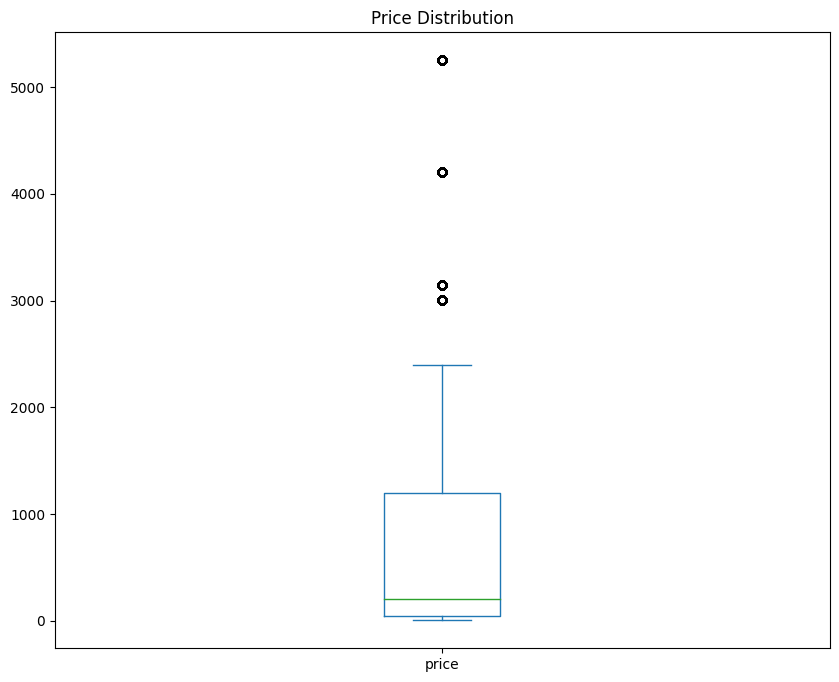

In [109]:
# Display Box Plot of price

%matplotlib inline
from matplotlib import pyplot as plt


# Plot a box-whisker chart
df['price'].plot(kind='box', title="Price Distribution", figsize=(10,8))
plt.show()

ada outliers yang terdeteksi dari box plot tersebut.

price skewness: 2.2474332910339436
price kurtosis: 6.168350065474848


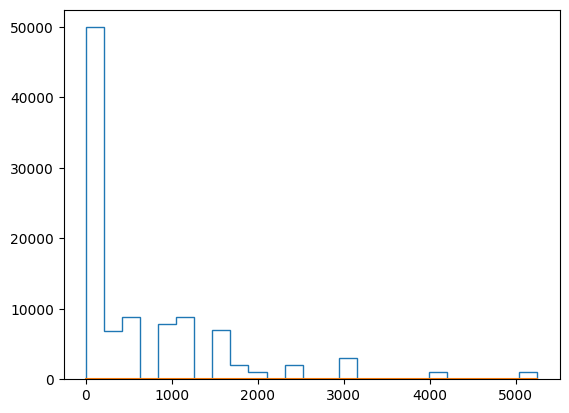

In [110]:
# menghitung skewness
numcols = ['price']
for col in numcols:
    print(df[col].name + ' skewness: ' + str(df[col].skew()))
    print(df[col].name + ' kurtosis: ' + str(df[col].kurt()))
    density = stats.gaussian_kde(df[col])
    n, x, _ = plt.hist(df[col], histtype='step', bins=25)  
    plt.plot(x, density(x)*6)
    plt.show()

skewness > 1 ini termasuk right - highly skewed.

##### Hitung outliers dengan Tukey's rule

In [111]:
# menghitung nilai quartile
q1,q2,q3 = df['price'].quantile([0.25, 0.5, 0.75])
print(q1,q2,q3)

45.45 203.3 1200.32


In [112]:
# menghitung upper boundary for extreme skewed
IQR = q3-q1
upper_boundary = q3 + (3 * IQR)
lower_boundary = q1 - (3 * IQR)
print(lower_boundary, upper_boundary)

-3419.16 4664.929999999999


In [113]:
# ambil index load_weight yang lebih besar dari upper_boundary atau lebih kecil dari lower_boundary
filtered_values = df[(df['price'] > upper_boundary) | (df['price'] < lower_boundary)].index

# cek unique value dari category
df.iloc[filtered_values].category.unique()

array(['Technology'], dtype=object)

In [114]:
# cek unique value dari harga
df.iloc[filtered_values].price.unique()

array([5250.])

Dilihat dari kategori yang terindikasi sebagai outliers semuanya termasuk 'Technology' dengan harga yang sama. Oleh karena itu price dan income bukanlah anomaly. Sehingga tidak bisa di drop.\
`Maka distribusi data memang tidak normal.` So lets make summarization with Tukey-5 Number Summary.

Tukey- 5 Number Summary :
1. Highest value
2. Lowest value
3. 1st quartile
4. 2nd quartile (median)
5. 3rd quartile

In [115]:
# highest value of income
df['income'].max()

26250.0

In [116]:
# lowest value of income
df['income'].min()

5.23

In [117]:
# 1st,2nd and 3rd quartile
q1,q2,q3 = df['income'].quantile([0.25, 0.5, 0.75])
print(f'Q1 = {q1}\nQ2 = {q2}\nQ3 = {q3}')

Q1 = 136.35000000000002
Q2 = 600.17
Q3 = 2700.7200000000003


In [118]:
q3-q1

2564.3700000000003

1. Pendapatan maximum adalah $26250
2. pendapatan minimum adalah $5.23
3. setengah pendapatan dari sampel berada diatas Q2 yaitu diatas 600.17 dan setengahnya berada dibawah 600.17.
4. Rentang interkuartil antara 136.35 - 2700.72. Setengah pendapatan berada dalam rentang ini. 25% < 136.35 dan 25% > 2700.72.  
5. Melihat skewness dengan membandingkan median dengan Q1 dan Q3. Median lebih dekat ke Q1 right-skewed. Median lebih dekat ke Q3 left skewed. `Maka data ini memang right-skewed.`

#### Hypothesis Analysis

In [119]:
#melihat rata-rata pendapatan setiap tahun
df.groupby('year')['income'].mean()

year
2021    2524.361434
2022    2534.232269
2023    2523.276581
Name: income, dtype: float64

Akan dilakukan pengecekan dengan hypothesis testing antara tahun 2021 dan 2023 karena keduanya memiliki mean yang tidak jauh berbeda.\
Namun apakah mereka significantly different ?
*Lets prove it!* menggunakan **t-test : two samples Independent Two Tailed Hypothesis Testing**\
Test ini menggunakan independent karena pendapatan tahun 2021 tidak mempengaruhi tahun 2023.\
Mean pendapatan 2021 = $2524.361434\
Mean pendapatan 2023 = $2523.276581

Hypothesis :

**H0: μ0 == μ1**

**H1: μ0 != μ1**

In [120]:
# memisahkan data tahun 2021 dan 2023
df_2021  = df[df['year']  == 2021].groupby('month')[['income']].sum().sort_values(by='month').reset_index()
df_2023  = df[df['year'] == 2023].groupby('month')[['income']].sum().sort_values(by='month').reset_index()
df_2021.set_index('month',inplace=True)
df_2023.set_index('month',inplace=True)

In [121]:
from scipy import stats
t_stat, p_val = stats.ttest_ind(df_2021,df_2023)
print('P-value:',p_val[0]) #the p-value isn't divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat[0])

P-value: 5.461449066679514e-11
t-statistics: 11.802803736780975


p_value < alpha\
Ini menunjukan bahwa **H0 rejected** yang berarti rata-rata pendapatan tahun 2021 __significantly different__ dengan 2023.

Hal ini terbukti dengan analisis problem yang dilakukan sebelumnya bahwa 2023 mengalami penurunan pendapatan yang signifikan.

#### SAVE DATAFRAME

In [150]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,income,age_category,year,month,day
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,7502.00,young,2022,5,Sunday
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,young,2021,12,Sunday
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity,300.08,young,2021,9,Saturday
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,old,2021,5,Sunday
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,old,2021,10,Sunday


In [152]:
# saving the dataframe
df.to_csv('Customer_Shopping_Data_cici-yuriza.csv', header=True, index=False)

### Conclusion and Overall Analysis

1. Tahun yang paling banyak pendapatan adalah 2022.
2. Tahun yang paling sedikit pendapatan adalah 2023.
2. Mall yang paling banyak pendapatan adalah Mall of Istanbul.
3. Bulan yang paling banyak pendapatan adalah Januari.
4. Hari yang paling banyak pendapatan adalah Monday(Senin).
5. Category paling banyak pendapatan adalah clothing, shoes dan technology.
6. Usia middle (30-50) paling banyak melakukan transaksi.
7. Metode pembayaran Cash yang paling diminati.
8. Distribusi data termasuk highly right-skewed.
9. Mean pendapatan 2021 hampir sama dengan mean pendapatan 2023 namun rata-rata keduanya `significantly different`.

Insight :\
Tim marketing dapat memasang iklan untuk mendapatkan maksimum income adalah pada hari Senin.\
Tim penjualan dapat memperbanyak category clothing, shoes dan technology.\
Tim dapat memaksimalkan semuanya(iklan dan category) untuk Mall of Istanbull dan Kanyon.

Perusahaan menargetkan 100% kenaikan pendapatan pada 2024. Apabila ditinjau dari tahun 2023 maka untuk mencapai 100% dari rata-rata pendapatan 2021-2023 agak sedikit terlihat tidak bisa karena terjadi penurunan pendapatan yang signifikan pada tahun 2023. Namun Apabila 100% dari tahun 2023 dengan memanfaatkan insight-insight yang didapatkan maka kemungkinan besar akan tercapai.



#### Visualization Dashboards

Link : https://public.tableau.com/views/customer_shopping_Data/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link